In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords

In [120]:
def info(df):
    zero_counts = (df == 0).sum()
    unique_counts = df.nunique()
    nan_counts = df.isnull().sum()
    nan_percentages = (nan_counts / len(df)) * 100
    info_df = pd.DataFrame({'Zero_Count': zero_counts, 'Unique_Count': unique_counts, 'NaN_Count': nan_counts, 'NaN_Percentage': nan_percentages})
    return info_df

In [121]:
pd.set_option('display.max_columns', None)

In [122]:
row_deleted_num = {}

In [123]:
df = pd.read_excel('electronika_03_04.xlsx') 

In [124]:
df.head()

,Order_ID,Email_new,Phone_new,Source,OrderDate,время,месяц,ChangeDate,DeliveryDate,PaymentDate,Status,Status_ID,OneClick,CancelReason,Actions,DeliveryType,PaymentType,Region,Area,Store_ID,FullSum,Discount,IM_Rozn_Sum,Row_ID,Articul,Nom_Name,NomGroup,Quant,RowPrice,RowDiscount,RowSum,Brand,TN,TK,NomFullPath,Week,Nom_ID
0,1303000509_TT,55666668105117_iu29@yandex.ru,55485656-57565656575275,Онлайн-Резерв.,2016-03-30,08:46:30.000,201603,2016-03-30 09:31:57.000,2016-04-06 00:00:00.000,1900-01-01 00:00:00.000,Отменен,17,0,Тестовый заказ,NaN,Самовывоз,Наличные,Москва,Москва,3066,39519.00,0.0,39519.00,1.0,1157790.0,Доставка до точки выдачи,Доставка,1.0,0.0,0.0,0.0,NaN,NaN,NaN,Услуги/Доставка/,13.0,35554.0
1,1303000509_TT,55666668105117_iu29@yandex.ru,55485656-57565656575275,Онлайн-Резерв.,2016-03-30,08:46:30.000,201603,2016-03-30 09:31:57.000,2016-04-06 00:00:00.000,1900-01-01 00:00:00.000,Отменен,17,0,Тестовый заказ,NaN,Самовывоз,Наличные,Москва,Москва,3066,39519.00,0.0,39519.00,3.0,1138110.0,"""Гарант +"" - Договор страхования, обеспечивающ...",Гарант +,1.0,3520.0,0.0,3520.0,NaN,NaN,NaN,Услуги/Страхование техники/Гарант +/,13.0,16686.0
2,1303000509_TT,55666668105117_iu29@yandex.ru,55485656-57565656575275,Онлайн-Резерв.,2016-03-30,08:46:30.000,201603,2016-03-30 09:31:57.000,2016-04-06 00:00:00.000,1900-01-01 00:00:00.000,Отменен,17,0,Тестовый заказ,NaN,Самовывоз,Наличные,Москва,Москва,3066,39519.00,0.0,39519.00,2.0,1180135.0,Телевизор LED Samsung UE-40J6200AU Smart,Smart телевизоры,1.0,35999.0,0.0,35999.0,Samsung,ТВ-Аудио,Телевизоры LCD,"Телевизоры, аудио, видео/Телевизоры/Smart теле...",13.0,95567.0
3,1303000510_TT,55666668105117_iu29@yandex.ru,55485656-57565656575275,Онлайн-Резерв.,2016-03-30,11:22:51.000,201603,2016-03-30 11:24:32.000,2016-04-06 00:00:00.000,1900-01-01 00:00:00.000,Отменен,17,0,Тестовый заказ,NaN,Курьерская,Наличные,Москва,Москва,2189,96665.66,0.0,96665.66,1.0,1104611.0,"Доставка ""Стандарт"" зона 0",Доставка,1.0,490.0,0.0,490.0,NaN,NaN,NaN,Услуги/Доставка/,13.0,29329.0
4,1303000510_TT,55666668105117_iu29@yandex.ru,55485656-57565656575275,Онлайн-Резерв.,2016-03-30,11:22:51.000,201603,2016-03-30 11:24:32.000,2016-04-06 00:00:00.000,1900-01-01 00:00:00.000,Отменен,17,0,Тестовый заказ,NaN,Курьерская,Наличные,Москва,Москва,2189,96665.66,0.0,96665.66,4.0,1087811.0,"Крепление LCD-телевизора на стену, подключение...",Установка и настройка ТВ,2.0,3990.0,0.0,7980.0,NaN,NaN,NaN,Установка и настройка техники/Установка и наст...,13.0,2748.0


In [145]:
len(df) - len(df.drop_duplicates())

10

In [125]:
info(df)

,Zero_Count,Unique_Count,NaN_Count,NaN_Percentage
Order_ID,0,166794,0,0.000000
Email_new,61516,99284,0,0.000000
Phone_new,7575,123135,0,0.000000
Source,0,4,0,0.000000
OrderDate,0,61,0,0.000000
время,0,58549,0,0.000000
месяц,0,2,0,0.000000
ChangeDate,0,155189,0,0.000000
DeliveryDate,0,100,0,0.000000
PaymentDate,0,105118,0,0.000000


# Распределения

## Source

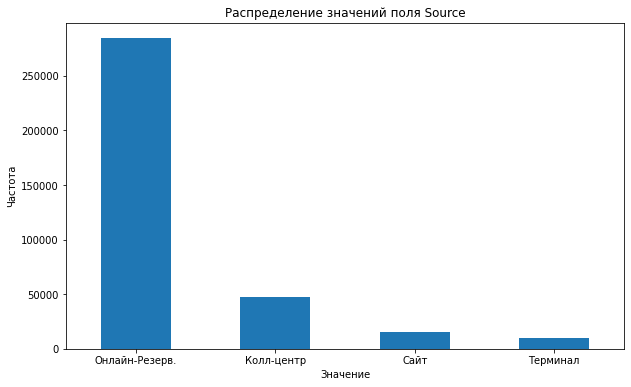

In [126]:
plt.figure(figsize=(10, 6))  # Размер графика (опционально)
df['Source'].value_counts().plot(kind='bar')
plt.title('Распределение значений поля Source')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.xticks(rotation=0)
plt.show()

## Время

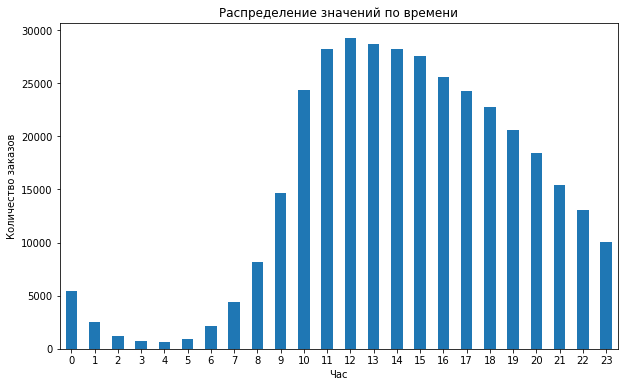

In [127]:
df['время'] = pd.to_datetime(df['время'], format='%H:%M:%S.000')
time_distribution = df['время'].dt.hour.value_counts().sort_index()

plt.figure(figsize=(10, 6))
time_distribution.plot(kind='bar')
plt.title('Распределение значений по времени')
plt.xlabel('Час')
plt.ylabel('Количество заказов')
plt.xticks(rotation=0)
plt.show()


Разобьем признак на бинарные признаки 'ночь' (с 0 до 6), 'утро' (с 6 до 12), 'до_обеда' (с 12 до 15), 'после_обеда' (с 15 до 18), 'вечер' (с 18 до 24), где 
каждый из признаков 1, если заказ был сделан в соответсвующее время

In [128]:
# Преобразование поля 'время' в тип данных datetime, если оно не является таким
df['время'] = pd.to_datetime(df['время'])

# Разделение времени на периоды дня
bins = [0, 6, 12, 15, 19, 24]
labels = ['ночь', 'утро', 'до_обеда', 'после_обеда', 'вечер']
df['период_дня'] = pd.cut(df['время'].dt.hour, bins=bins, labels=labels, right=False)

# Преобразование бинарных признаков в столбцы с помощью метода get_dummies()
time_periods = pd.get_dummies(df['период_дня'])

# Объединение полученных столбцов с исходным DataFrame
df = pd.concat([df, time_periods], axis=1)
df = df.drop('время', axis=1)
df = df.drop('период_дня', axis=1)

## OneClick

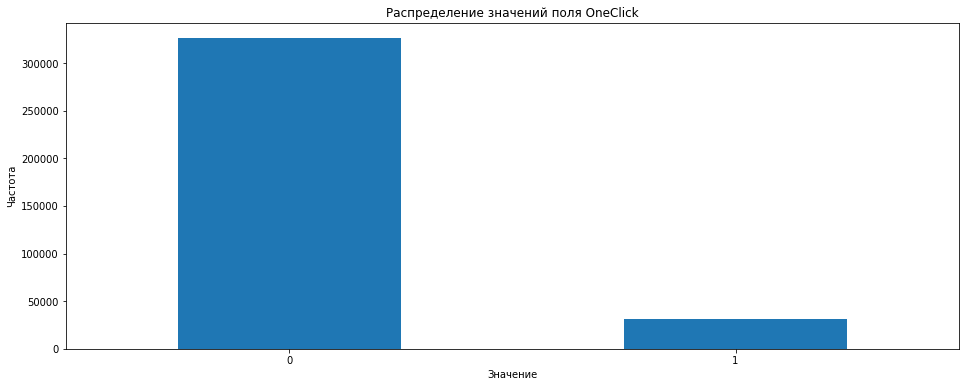

In [129]:
plt.figure(figsize=(16, 6))  # Размер графика (опционально)
df['OneClick'].value_counts().plot(kind='bar')
plt.title('Распределение значений поля OneClick')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.xticks(rotation=0)
plt.show()

## Actions

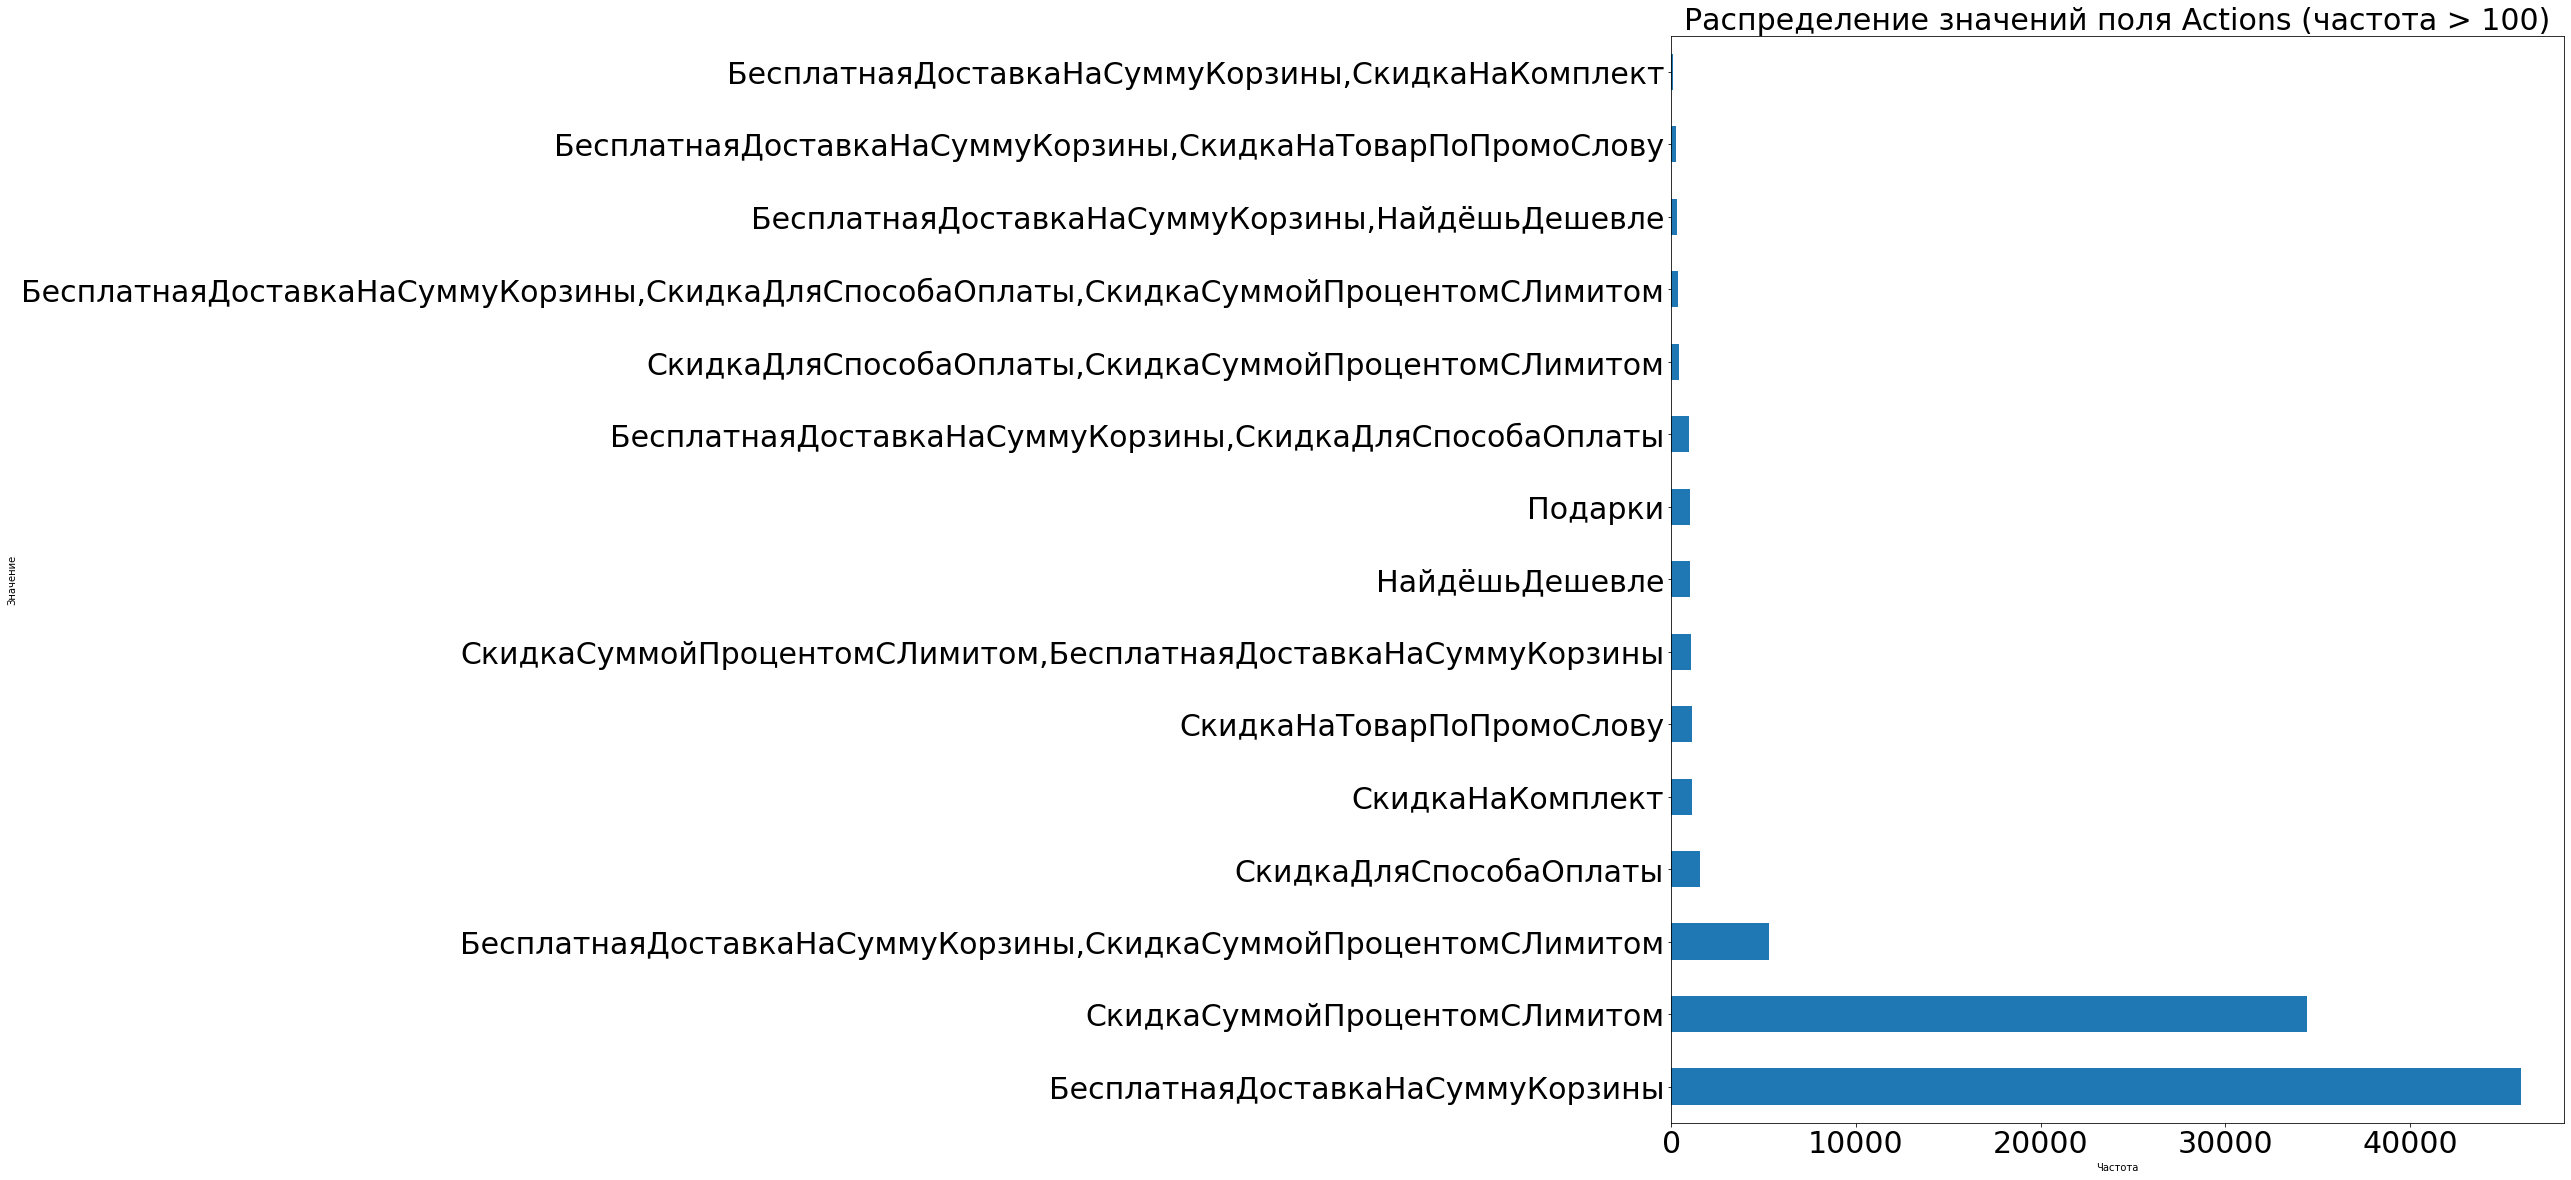

In [130]:
filtered_df = df['Actions'].value_counts().loc[lambda x: x > 100]

plt.figure(figsize=(16, 20)) 
filtered_df.plot(kind='barh')
plt.title('Распределение значений поля Actions (частота > 100)', fontsize=30)
plt.xlabel('Частота')
plt.ylabel('Значение')
plt.tick_params(axis='both', labelsize=30) 
plt.show()

Акции бывают следующие: 

'БесплатнаяДоставкаНаСуммуКорзины', 'СкидкаСуммойПроцентомСЛимитом', 'СкидкаНаТоварПоПромоСлову',
'СкидкаДляСпособаОплаты', 'НайдёшьДешевле', 'Подарки', 'СкидкаНаКомплект'

Для каждой акции создадим собственный признак

In [131]:
# Разделение значения в поле 'Actions' и создание бинарных признаков
actions = df['Actions'].str.get_dummies(',')

# Объединение бинарных признаков с исходным DataFrame
df = pd.concat([df, actions], axis=1)

In [132]:
df = df.drop('Actions', axis=1)

## DeliveryType

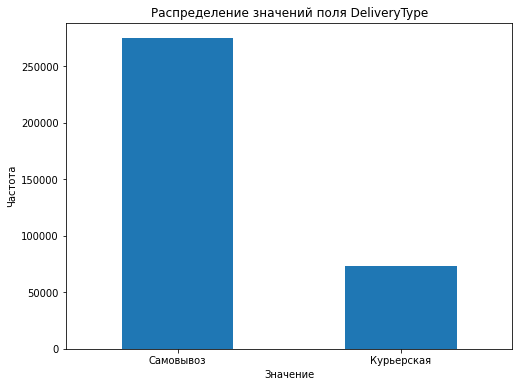

In [133]:
plt.figure(figsize=(8,6 ))  # Размер графика (опционально)
df['DeliveryType'].value_counts().plot(kind='bar')
plt.title('Распределение значений поля DeliveryType')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.xticks(rotation=0)
plt.show()


Признак бинарный, поэтому заменим на 1/0

In [134]:
df['DeliveryType'] = df['DeliveryType'].replace({'Курьерская': 0, 'Самовывоз': 1})

In [135]:
# Переименование признака в 'is_handed_over'
df = df.rename(columns={'DeliveryType': 'is_pickup'})

## PaymentType

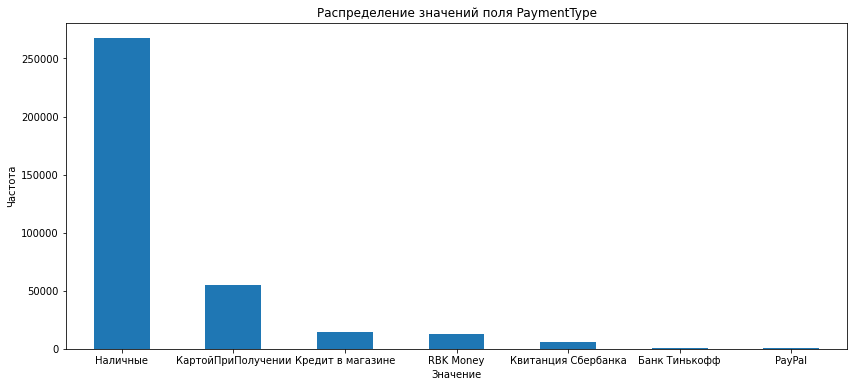

In [136]:
plt.figure(figsize=(14,6))  # Размер графика (опционально)
df['PaymentType'].value_counts().plot(kind='bar')
plt.title('Распределение значений поля PaymentType')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.xticks(rotation=0)
plt.show()

По факту все значения можно разбить на Наличиные/Безналичные/Кредит. Приведем значения к таким

In [137]:
df['PaymentType'] = df['PaymentType'].replace({'Квитанция Сбербанка': 'Безналичная', 'КартойПриПолучении': 'Безналичная',
                                              'RBK Money': 'Безналичная', 'PayPal': 'Безналичная', 
                                              'Банк Тинькофф': 'Безналичная'}) 
# исправить

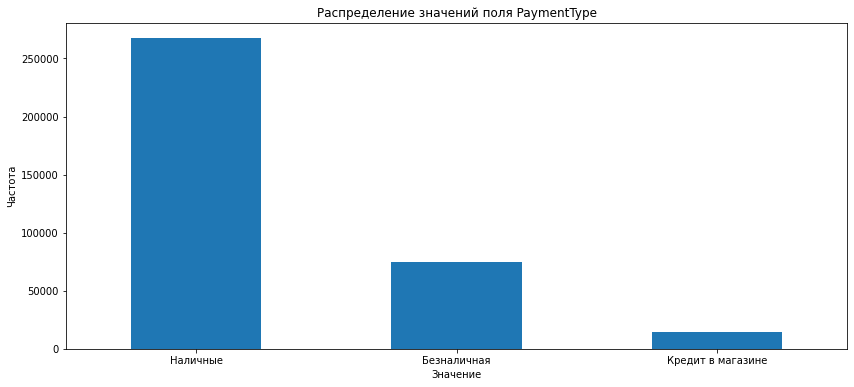

In [138]:
plt.figure(figsize=(14,6))  # Размер графика (опционально)
df['PaymentType'].value_counts().plot(kind='bar')
plt.title('Распределение значений поля PaymentType')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.xticks(rotation=0)
plt.show()

## Area

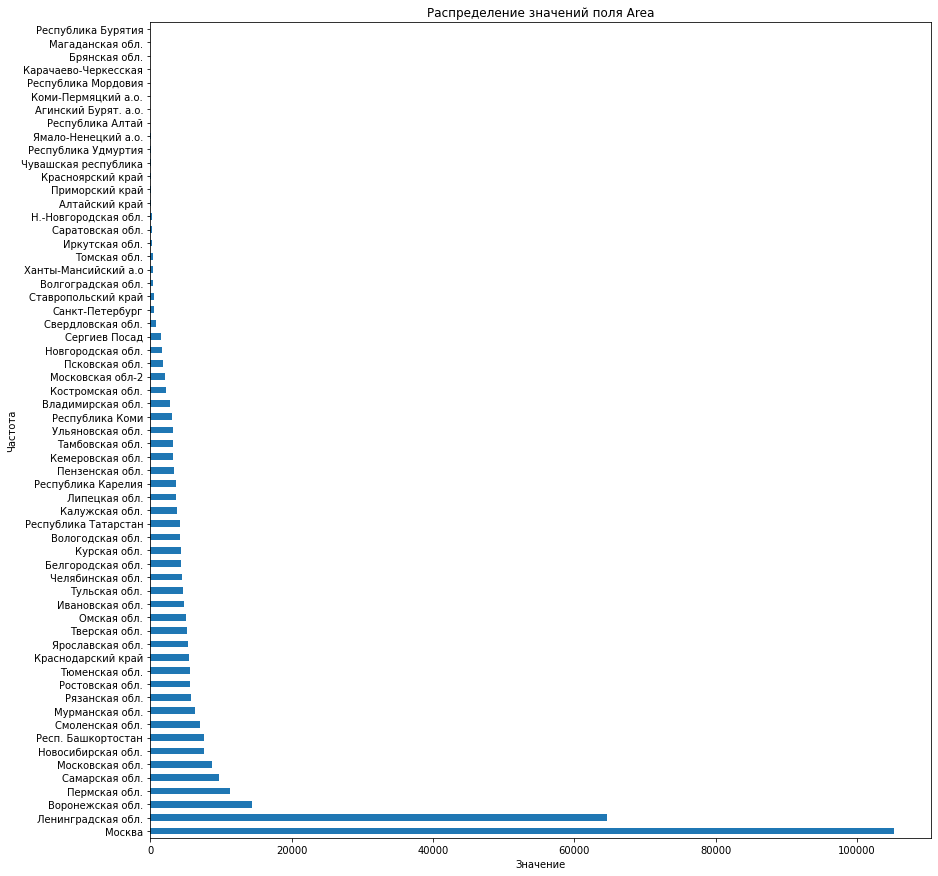

In [139]:
plt.figure(figsize=(14,15))  # Размер графика (опционально)
df['Area'].value_counts().plot(kind='barh')
plt.title('Распределение значений поля Area')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.xticks(rotation=0)
plt.show()

In [140]:
obl2fo = {
    'Москва': 'ЦФО',
    'Ленинградская обл.': 'СЗФО',
    'Московская обл.': 'ЦФО',
    'Псковская обл.': 'СЗФО',
    'Смоленская обл.': 'ЦФО',
    'Ивановская обл.': 'ЦФО',
    'Мурманская обл.': 'СЗФО',
    'Новосибирская обл.': 'СФО',
    'Тульская обл.': 'ЦФО',
    'Тверская обл.': 'ЦФО',
    'Пермская обл.': 'ПФО',
    'Белгородская обл.': 'ЦФО',
    'Тамбовская обл.': 'ЦФО',
    'Республика Татарстан': 'ПФО',
    'Свердловская обл.': 'УФО',
    'Краснодарский край': 'ЮФО',
    'Челябинская обл.': 'УФО',
    'Воронежская обл.': 'ЦФО',
    'Ростовская обл.': 'ЮФО',
    'Курская обл.': 'ЦФО',
    'Омская обл.': 'СФО',
    'Ханты-Мансийский а.о': 'УФО',
    'Респ. Башкортостан': 'ПФО',
    'Красноярский край': 'СФО',
    'Кемеровская обл.': 'СФО',
    'Калужская обл.': 'ЦФО',
    'Тюменская обл.': 'УФО',
    'Липецкая обл.': 'ЦФО',
    'Рязанская обл.': 'ЦФО',
    'Новгородская обл.': 'СЗФО',
    'Ярославская обл.': 'ЦФО',
    'Самарская обл.': 'ПФО',
    'Владимирская обл.': 'ЦФО',
    'Сергиев Посад': 'ЦФО',
    'Республика Коми': 'СЗФО',
    'Ставропольский край': 'ЮФО',
    'Московская обл-2': 'ЦФО',
    'Республика Карелия': 'СЗФО',
    'Волгоградская обл.': 'ЮФО',
    'Вологодская обл.': 'СЗФО',
    'Пензенская обл.': 'ПФО',
    'Чувашская республика': 'ПФО',
    'Санкт-Петербург': 'СЗФО',
    'Магаданская обл.': 'ДФО',
    'Агинский Бурят. а.о.': 'ДФО',
    'Республика Мордовия': 'ПФО',
    'Коми-Пермяцкий а.о.': 'ПФО',
    'Республика Удмуртия': 'ПФО',
    'Республика Алтай': 'СФО',
    'Ямало-Ненецкий а.о.': 'УФО',
    'Алтайский край': 'СФО',
    'Приморский край': 'ДФО',
    'Н.-Новгородская обл.': 'ПФО',
    'Саратовская обл.': 'ПФО',
    'Иркутская обл.': 'СФО',
    'Томская обл.': 'СФО',
    'Костромская обл.': 'ЦФО',
    'Ульяновская обл.': 'ПФО',
}


df['Area'] = df['Area'].replace(obl2fo)

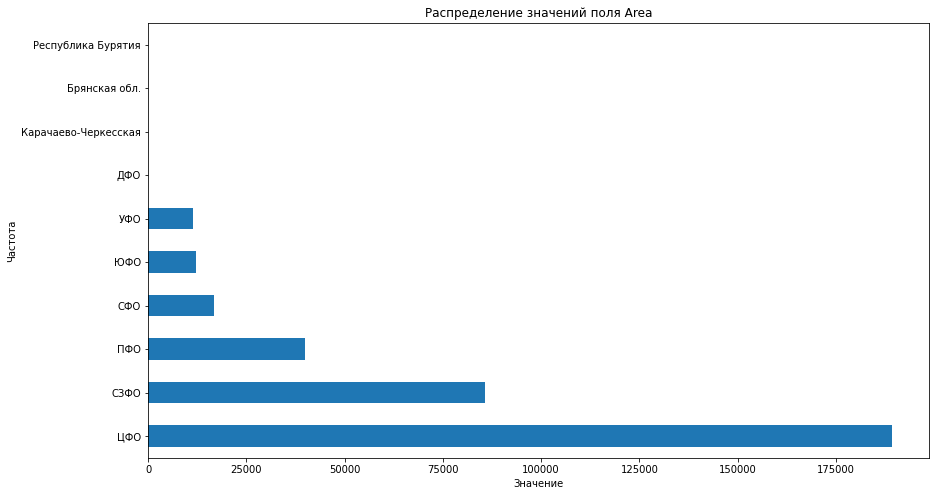

In [141]:
plt.figure(figsize=(14,8))  # Размер графика (опционально)
df['Area'].value_counts().plot(kind='barh')
plt.title('Распределение значений поля Area')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.xticks(rotation=0)
plt.show()

In [144]:
len(df[((df['FullSum'] > 0) & (df['FullSum'] < 200)) | ((df['RowSum'] > 0) & (df['RowSum'] < 200))])

7472

## FullSum

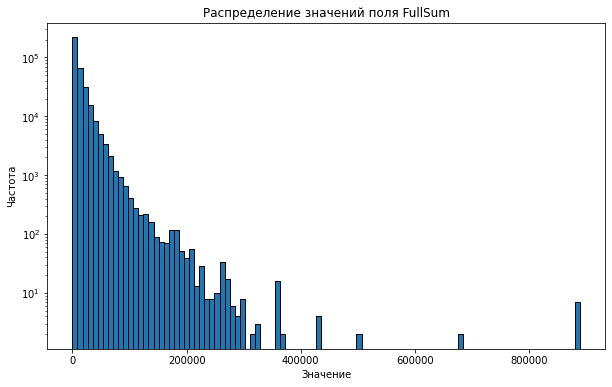

In [24]:
plt.figure(figsize=(10, 6))  # Размер графика (опционально)

# Построение гистограммы
plt.hist(df['FullSum'], bins=100, edgecolor='black')

plt.title('Распределение значений поля FullSum')
plt.xlabel('Значение')
plt.ylabel('Частота')

plt.yscale('log')  # Логарифмированная шкала по оси y

plt.show()


Присутствуют значения, которые слишком большие. Уберем объекты, где FullSum > 200000

In [25]:
row_deleted_num['FullSum too high (>200000)'] = len(df[df['FullSum'] > 200000])
df = df[df['FullSum'] <= 200000]

Удалим значения где сумма слишком маленькая. Скажем меньше 200

In [26]:
row_deleted_num['FullSum too low (<200)'] = len(df[df['FullSum'] < 200])
df = df[df['FullSum'] > 200]

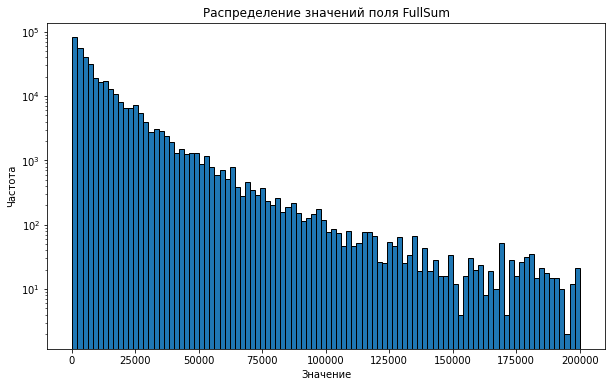

In [27]:
plt.figure(figsize=(10, 6))  # Размер графика (опционально)

# Построение гистограммы
plt.hist(df['FullSum'], bins=100, edgecolor='black')

plt.title('Распределение значений поля FullSum')
plt.xlabel('Значение')
plt.ylabel('Частота')

plt.yscale('log')  # Логарифмированная шкала по оси y

plt.show()

## Discount

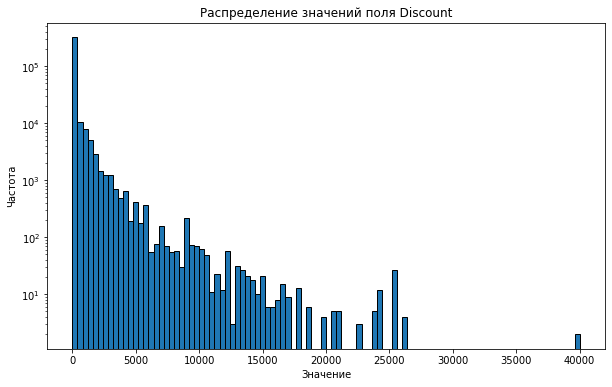

In [28]:
plt.figure(figsize=(10, 6))  # Размер графика (опционально)


# Построение гистограммы
plt.hist(df['Discount'], bins=100, edgecolor='black')

plt.title('Распределение значений поля Discount')
plt.xlabel('Значение')
plt.ylabel('Частота')

plt.yscale('log')  # Логарифмированная шкала по оси y

plt.show()

Аналогично. Уберем значения, где скидка > 15000

In [29]:
row_deleted_num['Discount too high (>15000)'] = len(df[df['Discount'] > 15000])
df = df[df['Discount'] <= 15000]

Также уберем строки, где скидка составила 90% от суммы чека

In [30]:
row_deleted_num['Discount too high (>90%)'] = len(df[df['Discount'] >= 0.9 * df['FullSum']])
df = df[df['Discount'] < 0.9 * df['FullSum']]

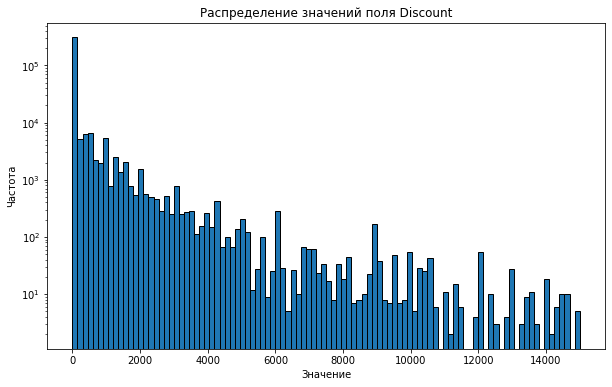

In [31]:
plt.figure(figsize=(10, 6))  # Размер графика (опционально)


# Построение гистограммы
plt.hist(df['Discount'], bins=100, edgecolor='black')

plt.title('Распределение значений поля Discount')
plt.xlabel('Значение')
plt.ylabel('Частота')

plt.yscale('log')  # Логарифмированная шкала по оси y

plt.show()

## RowPrice

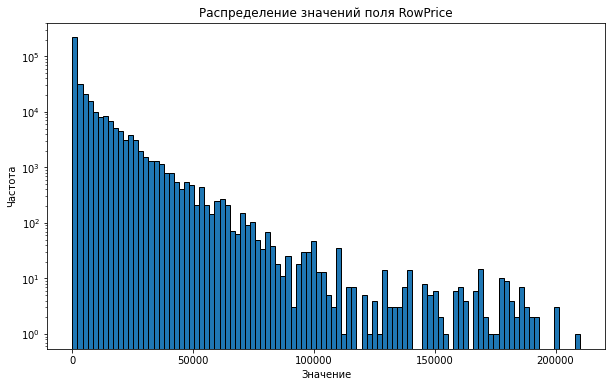

In [32]:
plt.figure(figsize=(10, 6))  # Размер графика (опционально)


# Построение гистограммы
plt.hist(df['RowPrice'], bins=100, edgecolor='black')

plt.title('Распределение значений поля RowPrice')
plt.xlabel('Значение')
plt.ylabel('Частота')

plt.yscale('log')  # Логарифмированная шкала по оси y

plt.show()

Удалим строки с дешевыми товарами и сликшом дорогими

In [33]:
row_deleted_num['RowPrice too high (>200000)'] = len(df[df['RowPrice'] > 200000])
row_deleted_num['RowPrice too low (<200)'] = len(df[df['RowPrice'] < 200])
df = df[(200 < df['RowPrice']) & (df['RowPrice'] < 200000)]

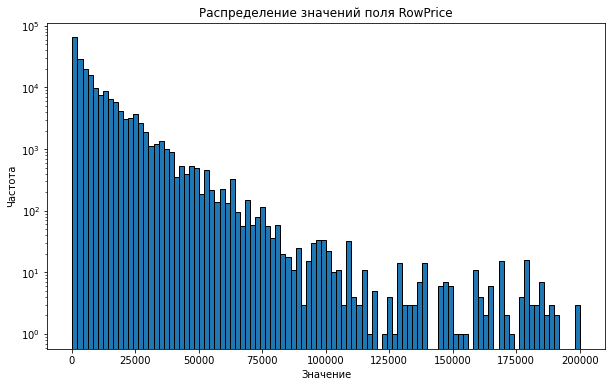

In [34]:
plt.figure(figsize=(10, 6))  # Размер графика (опционально)


# Построение гистограммы
plt.hist(df['RowPrice'], bins=100, edgecolor='black')

plt.title('Распределение значений поля RowPrice')
plt.xlabel('Значение')
plt.ylabel('Частота')

plt.yscale('log')  # Логарифмированная шкала по оси y

plt.show()

## RowDiscount

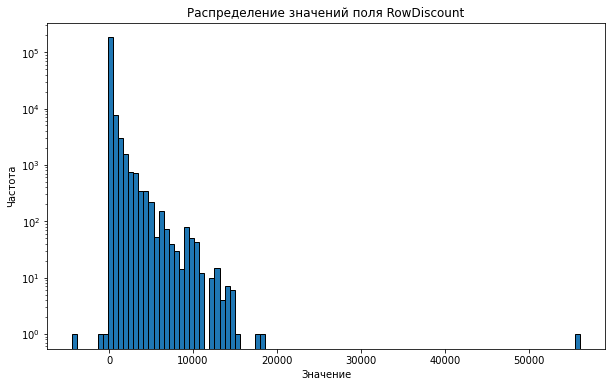

In [35]:
plt.figure(figsize=(10, 6))  # Размер графика (опционально)


# Построение гистограммы
plt.hist(df['RowDiscount'], bins=100, edgecolor='black')

plt.title('Распределение значений поля RowDiscount')
plt.xlabel('Значение')
plt.ylabel('Частота')

plt.yscale('log')  # Логарифмированная шкала по оси y

plt.show()

Удалим отрицательные скидки, слишком большие, а также те, которые составляют 90% от цены

In [36]:
row_deleted_num['RowDiscount too high (>15000)'] = len(df[df['RowDiscount'] > 15000])
row_deleted_num['RowDiscount too high (>90%)'] = len(df[df['RowDiscount'] >= 0.9 * df['RowPrice']])
row_deleted_num['RowDiscount < 0'] = len(df[df['RowDiscount'] < 0])
df = df[(df['RowDiscount'] >= 0) & (df['RowDiscount'] <= 15000) & (df['RowDiscount'] < 0.9 * df['RowPrice'])]

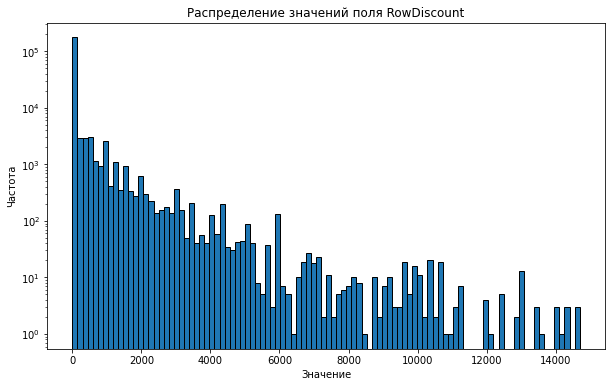

In [37]:
plt.figure(figsize=(10, 6))  # Размер графика (опционально)


# Построение гистограммы
plt.hist(df['RowDiscount'], bins=100, edgecolor='black')

plt.title('Распределение значений поля RowDiscount')
plt.xlabel('Значение')
plt.ylabel('Частота')

plt.yscale('log')  # Логарифмированная шкала по оси y

plt.show()

## TN

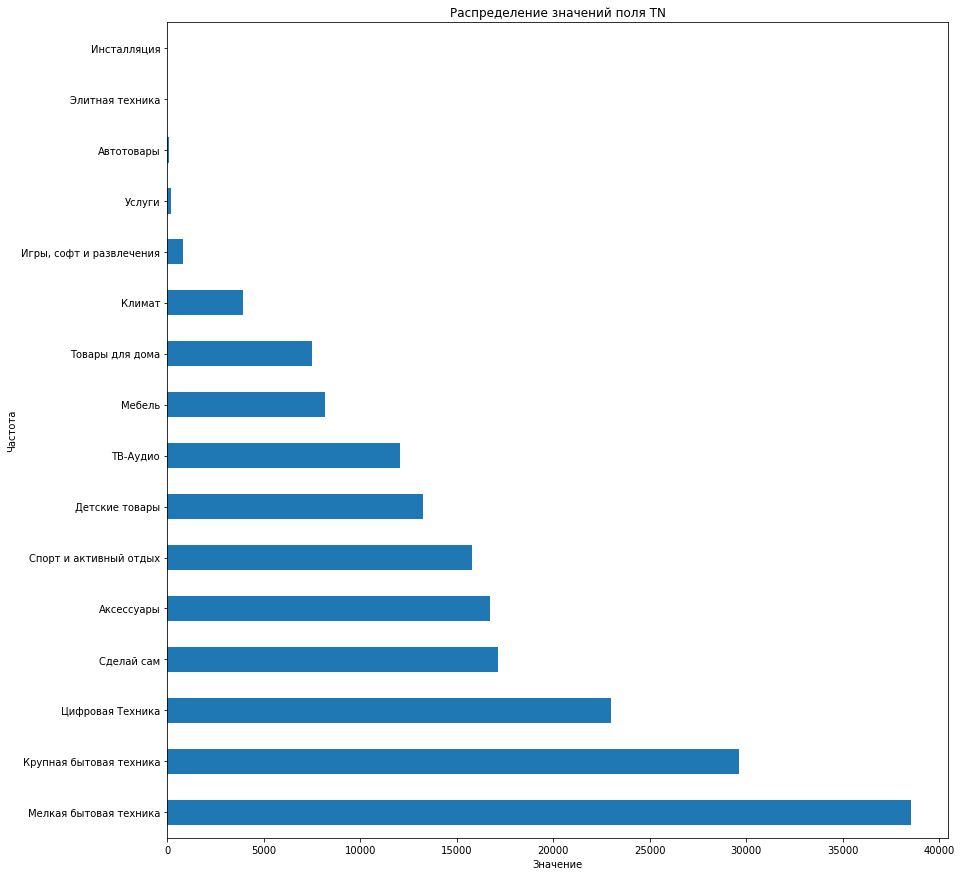

In [38]:
plt.figure(figsize=(14,15))  # Размер графика (опционально)
df['TN'].value_counts().plot(kind='barh')
plt.title('Распределение значений поля TN')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.xticks(rotation=0)
plt.show()

## TK

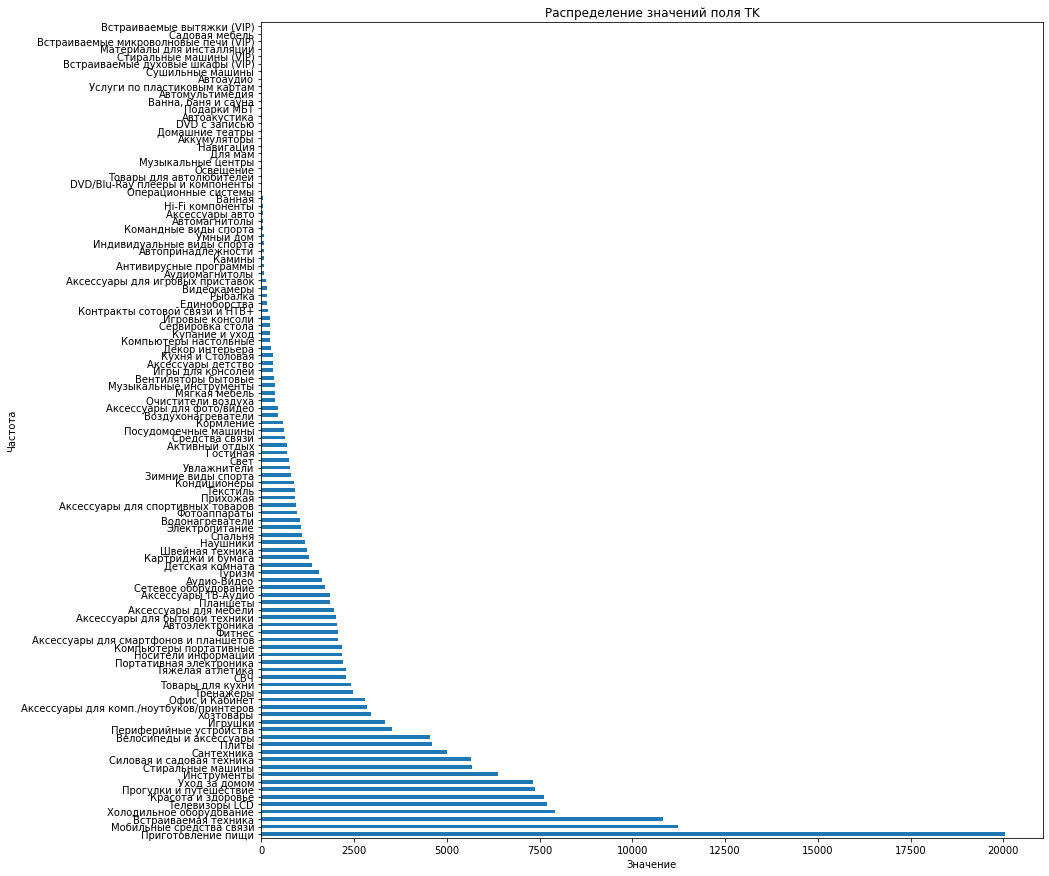

In [39]:
plt.figure(figsize=(14,15))  # Размер графика (опционально)
df['TK'].value_counts().plot(kind='barh')
plt.title('Распределение значений поля TK')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.xticks(rotation=0)
plt.show()

## Сводные Таблицы

Прежде чем удалять ненужные столбцы и отмененные заказы, построим сводную таблицу по размещенным заказам

In [40]:
df_placed_grouped = df.groupby('месяц').agg(
    Сумма_заказов=('FullSum', 'sum'),
    Кол_во_заказов=('Order_ID', 'nunique'),
    Кол_во_уникальных_клиентов=('Email_new', 'nunique'),
    Средний_чек=('FullSum', 'mean'),
    Среднее_кол_во_товаров=('Quant', 'mean')
)

# Вывод результатов
df_placed_grouped

,Сумма_заказов,Кол_во_заказов,Кол_во_уникальных_клиентов,Средний_чек,Среднее_кол_во_товаров
месяц,,,,,
201603,1.257011e+09,85678,54301,12372.156030,1.050374
201604,1.197677e+09,79132,47603,12545.849146,1.049579


In [41]:
df_placed_grouped.to_csv('orders_placed.csv')

Теперь построим таблицу по выданным заказам

In [42]:
df_issued = df.copy()
df_issued = df_issued[df_issued['Status'] == 'Выдан клиенту']
df_issued = df_issued[df_issued['CancelReason'].isnull()]

In [43]:
df_issued_grouped = df_issued.groupby('месяц').agg(
    Сумма_заказов=('FullSum', 'sum'),
    Кол_во_заказов=('Order_ID', 'nunique'),
    Кол_во_уникальных_клиентов=('Email_new', 'nunique'),
    Средний_чек=('FullSum', 'mean'),
    Среднее_кол_во_товаров=('Quant', 'mean')
)

# Вывод результатов
df_issued_grouped

,Сумма_заказов,Кол_во_заказов,Кол_во_уникальных_клиентов,Средний_чек,Среднее_кол_во_товаров
месяц,,,,,
201603,6.751427e+08,54579,38595,10439.974225,1.038875
201604,6.521080e+08,51372,34370,10546.277372,1.042825


In [44]:
df_issued_grouped.to_csv('orders_issued.csv')

Тепеь сделаем таблицу по проценту выкупа

In [45]:
# Объединение двух датафреймов по индексу (месяцам)
df_percentage = pd.concat([df_placed_grouped, df_issued_grouped], axis=1, keys=['Placed', 'Issued'])

# Расчет доли выкупленной суммы заказов
df_percentage['Доля_выкупленной_суммы'] = df_percentage['Issued']['Сумма_заказов'] / df_percentage['Placed']['Сумма_заказов'] * 100

# Расчет доли выкупленного количества заказов
df_percentage['Доля_выкупленного_количества'] = df_percentage['Issued']['Кол_во_заказов'] / df_percentage['Placed']['Кол_во_заказов'] * 100

# Вывод нового датафрейма
df_percentage = df_percentage[['Доля_выкупленной_суммы', 'Доля_выкупленного_количества']]

In [46]:
df_percentage

,Доля_выкупленной_суммы,Доля_выкупленного_количества
,,
месяц,,
201603,53.710164,63.702467
201604,54.447735,64.919375


In [47]:
df_percentage.to_csv('orders_percentage.csv')

## Status

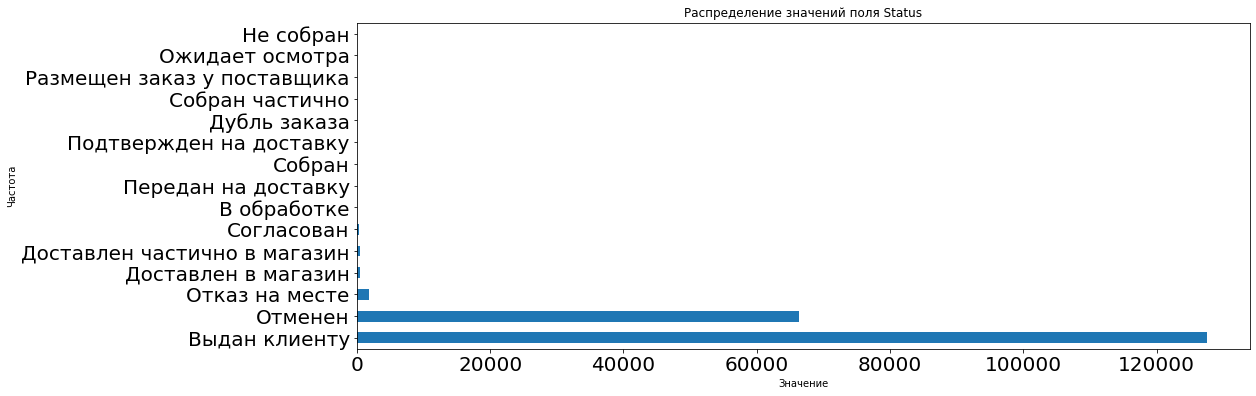

In [48]:
plt.figure(figsize=(16, 6))  # Размер графика (опционально)
df['Status'].value_counts().plot(kind='barh')
plt.title('Распределение значений поля Status')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.tick_params(axis='both', labelsize=20) 
plt.show()

Оставим только выданные заказы

In [49]:
row_deleted_num['not_issued'] = len(df[df['Status'] != 'Выдан клиенту'])

In [50]:
df = df[df['Status'] == 'Выдан клиенту']
df = df.drop('Status', axis=1)

## CancelReason

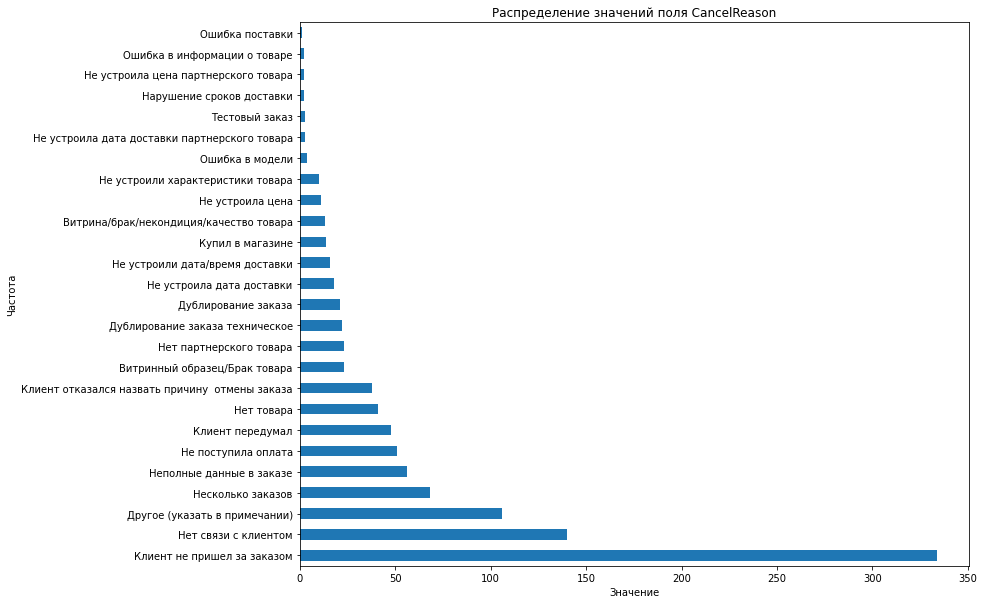

In [51]:
plt.figure(figsize=(12, 10))  # Размер графика (опционально)
df['CancelReason'].value_counts().plot(kind='barh')
plt.title('Распределение значений поля CancelReason')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.show()


Мы вроде удалили невыданные заказы, но почему то заказы с полем CancelReason остались. Удалим

In [52]:
row_deleted_num['not_issued'] += len(df[df['CancelReason'].notnull()])
df = df[df['CancelReason'].isnull()]
df = df.drop('CancelReason', axis=1)

# Удаляем лишние столбцы

Будпм определять клиентов по номеру телефона, следовательно email не нужен

Информация о месяце является бесполезной. Удалим

Также удалим информацию о дате заказа, дате изменения заказа, дате доставки и дате оплаты

Status_ID дублирует Status, который мы удалили, поэтому также удалим

IM_Rozn_Sum дублирует информацию

Row_ID, Articul бесполезные признаки

Region лишний, так как значений слишком много и уже есть area

NomGroup не используем так как есть TN и TK

RowSum удаляем, так как есть линейная зависимость от RowPrice и RowDiscount

Brand также удалим, так как не несет существенной информации, но сохраним список брендов на будущее

NomFullPath дублирует информацию

Week не несет полезной информации

Nom_ID дублирует наименование

In [53]:
df['Brand'] = df['Brand'].str.lower()
brands = set(df['Brand'].unique())

In [54]:
columns_to_remove = ['Email_new', 'месяц', 'ChangeDate', 'DeliveryDate', 'PaymentDate', 'Status_ID',
                    'IM_Rozn_Sum', 'Row_ID', 'Articul', 'NomGroup', 'Brand', 'RowSum', 'NomFullPath', 'Week',
                    'Nom_ID', 'OrderDate', 'Region']
df = df.drop(columns=columns_to_remove)

# Избавляемся от NaNов

In [55]:
info(df)

,Zero_Count,Unique_Count,NaN_Count,NaN_Percentage
Order_ID,0,105951,0,0.000000
Phone_new,2716,88210,0,0.000000
Source,0,4,0,0.000000
OneClick,118955,2,0,0.000000
is_pickup,35235,2,13,0.010277
PaymentType,0,3,0,0.000000
Area,0,7,270,0.213435
Store_ID,0,158,0,0.000000
FullSum,0,12369,0,0.000000
Discount,108438,1627,0,0.000000


Для строк признака is_pickup заполним nan значением 1.

In [56]:
df['is_pickup'] = df['is_pickup'].fillna(1)

Удалим строки, где неизвестно наименование товара

In [57]:
row_deleted_num['no name'] = len(df[df['Nom_Name'].isnull()])
df = df.dropna(subset=['Nom_Name'])

Удалим строки, где неизвестен номер телефона

In [58]:
row_deleted_num['no phone'] = len(df[df['Phone_new'] == 0])
df = df[df['Phone_new'] != 0]

In [59]:
most_common_area = df['Area'].mode().values[0]
df['Area'] = df['Area'].fillna(most_common_area)

## Восстановлние TN

Для каждой категории опредлим слова, которые чаще всего встречаются в названиях

In [60]:
TN_values = df['TN'].unique()
TN2word = {tn: [] for tn in TN_values}

In [61]:

def plot_dist_of_words(category, num):
    # Фильтрация строк с категорией category
    filtered_df = df[df['TN'] == category]

    # Объединение названий товаров в одну строку
    product_names = ' '.join(filtered_df['Nom_Name'])

    # Токенизация текста на отдельные слова
    tokens = word_tokenize(product_names)

    # Удаление стоп-слов
    stop_words = brands
    tokens = [word.lower() for word in tokens if word.lower() not in stop_words and len(word) > 2]

    # Вычисление частоты встречаемости слов
    freq_dist = FreqDist(tokens)

    # Получение num наиболее часто встречающихся слов и их частот
    most_common_words = freq_dist.most_common(num)
    words, frequencies = zip(*most_common_words)

    # Построение графика
    plt.figure(figsize=(20, 6))
    plt.bar(words, frequencies)
    plt.title('Распределение частоты слов в названиях товаров')
    plt.xlabel('Слова')
    plt.ylabel('Частота')
    plt.xticks(rotation=45)
    plt.show()
    
    return most_common_words


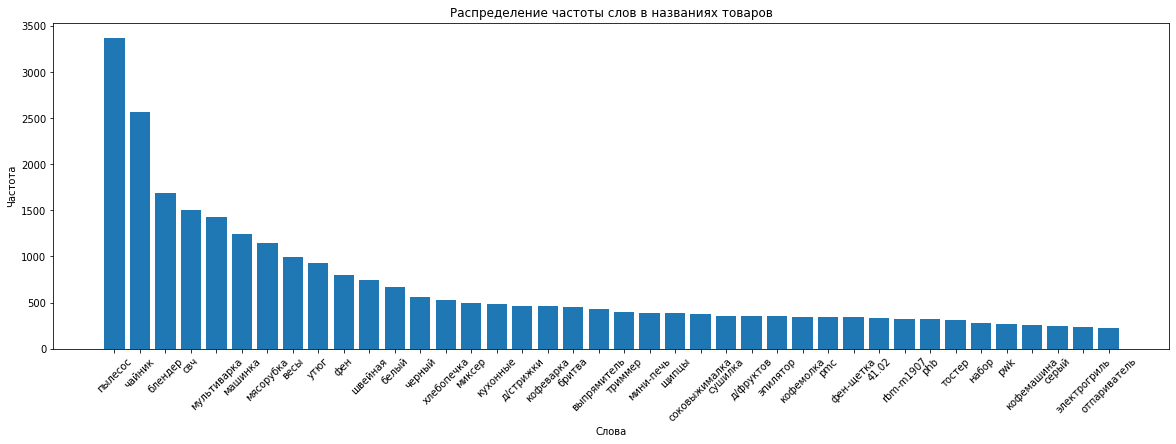

In [62]:
TN2word['Мелкая бытовая техника'] = [pair[0] for pair in plot_dist_of_words('Мелкая бытовая техника', 40)]
words_to_remove = ['41.02', 'RBM-M1907', 'Набор', 'серый', 'PHB', 'PWK', 'PMC']
TN2word['Мелкая бытовая техника'] = [word for word in TN2word['Мелкая бытовая техника'] if word not in words_to_remove]

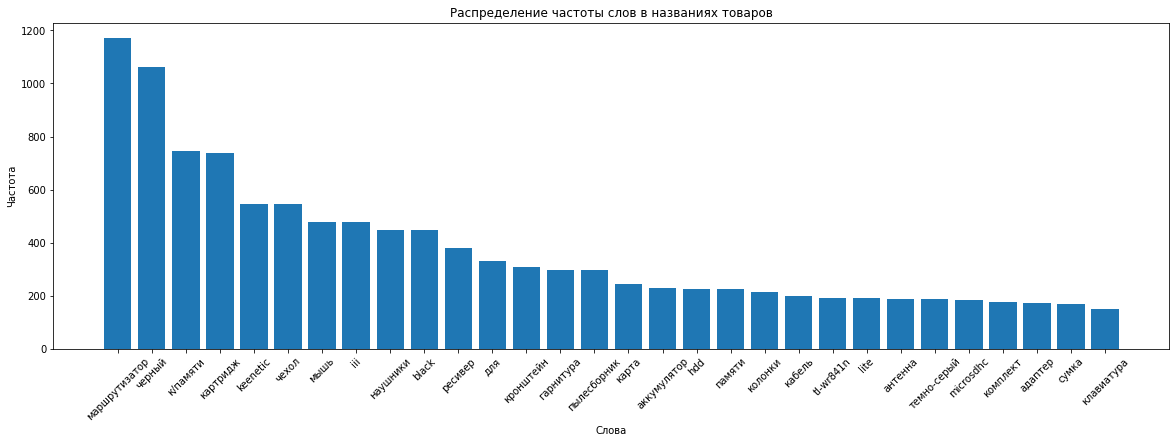

In [63]:
TN2word['Аксессуары'] = [pair[0] for pair in plot_dist_of_words('Аксессуары', 30)]
words_to_remove = ['TL-WR841N', 'III', 'Lite', 'black', 'памяти', 'черный', 'Keenetic', 'темно-серый']
TN2word['Аксессуары'] = [word for word in TN2word['Аксессуары'] if word not in words_to_remove]

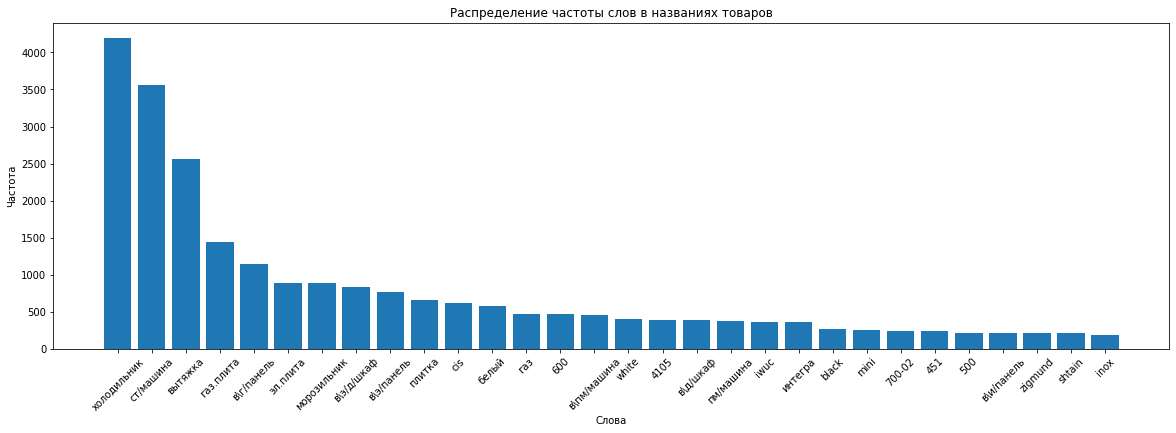

In [64]:
TN2word['Крупная бытовая техника'] = [pair[0] for pair in plot_dist_of_words('Крупная бытовая техника', 30)]
words_to_remove = ['CIS', 'белый', '600', '4105', 'IWUC', 'Интегра', 'MINI', 
                   'white', '700-02', '451', '500', 'Zigmund', 'BLACK', 'Shtain', '1210']
TN2word['Крупная бытовая техника'] = [word for word in TN2word['Крупная бытовая техника'] if word not in words_to_remove]

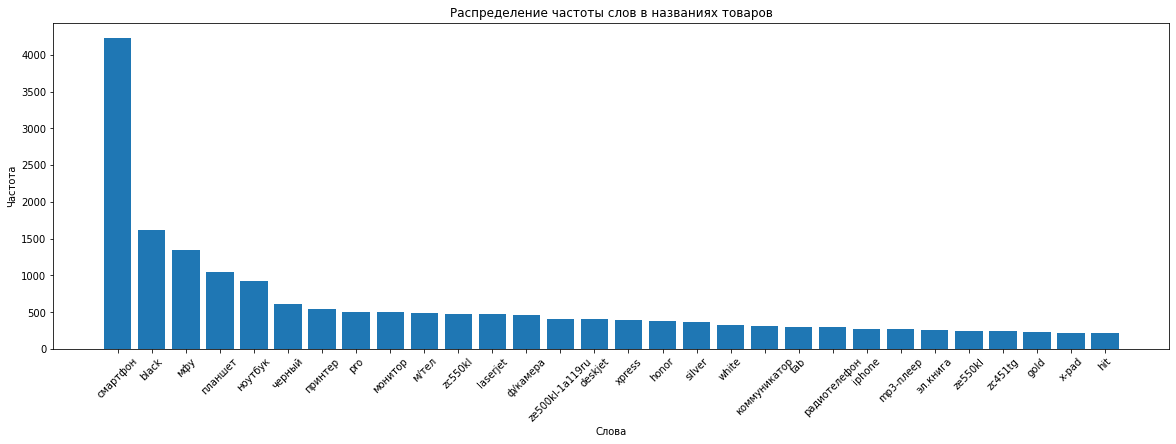

In [65]:
TN2word['Цифровая Техника'] = [pair[0] for pair in plot_dist_of_words('Цифровая Техника', 30)]
words_to_remove = ['black', 'черный', 'Pro', 'ZC550KL', 'LaserJet', 'ZE500KL-1A119RU', 'DeskJet', 
                   'Xpress', 'Honor', 'silver', 'ZE550KL', 'ZC451TG', 'Hit', 'gold', 'TM-7866', 'white']
TN2word['Цифровая Техника'] = [word for word in TN2word['Цифровая Техника'] if word not in words_to_remove]

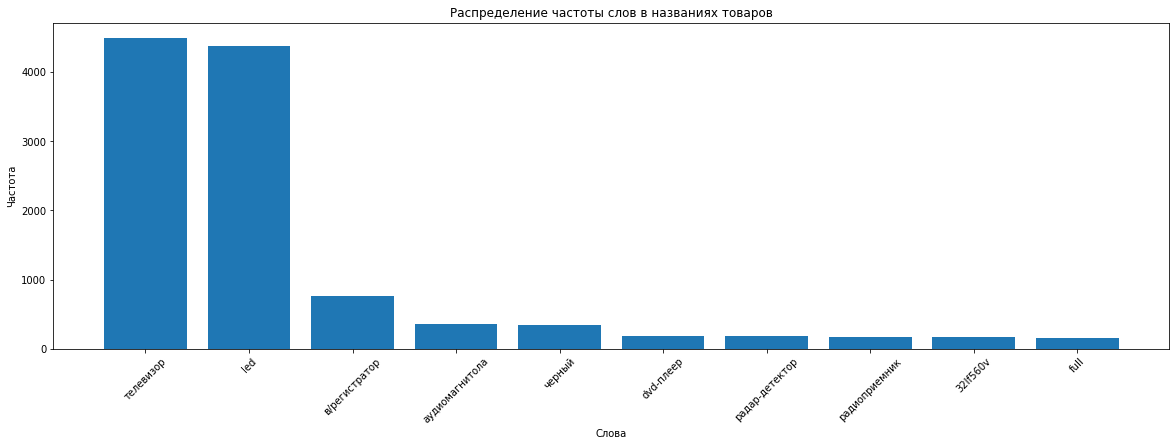

In [66]:
TN2word['ТВ-Аудио'] = [pair[0] for pair in plot_dist_of_words('ТВ-Аудио', 10)]
words_to_remove = ['черный', '32LF560V']
TN2word['ТВ-Аудио'] = [word for word in TN2word['ТВ-Аудио'] if word not in words_to_remove]
TN2word['ТВ-Аудио'].extend(['музыкальный'])

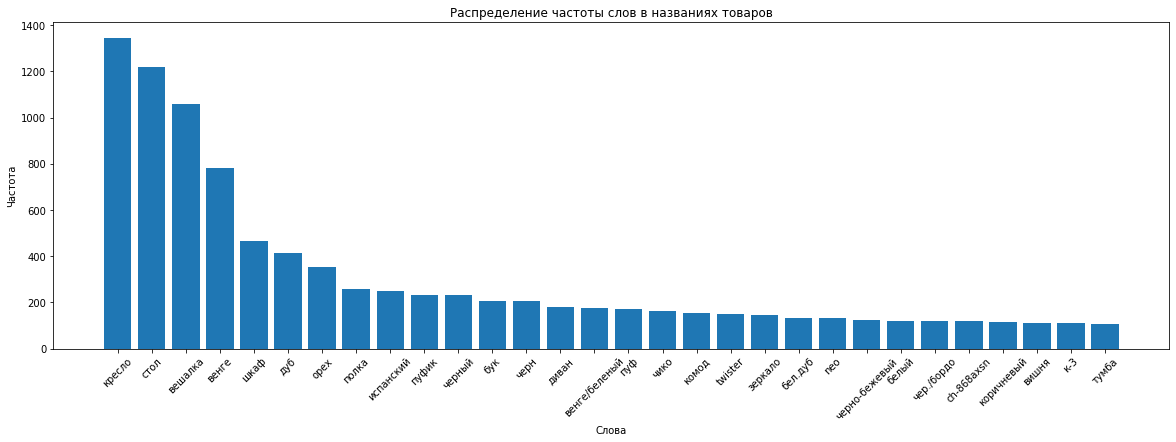

In [67]:
TN2word['Мебель'] = [pair[0] for pair in plot_dist_of_words('Мебель', 30)]
words_to_remove = ['Twister', 'венге', 'дуб', 'орех', 'черный', 'бук', 'черн', 'венге/беленый', 'испанский', 
                   'Чико', 'бел.дуб', 'черно-бежевый', 'белый', 'NEO', 'чер./бордо', 'CH-868AXSN', 'коричневый',
                   'К-3', 'вишня',]
TN2word['Мебель'] = [word for word in TN2word['Мебель'] if word not in words_to_remove]

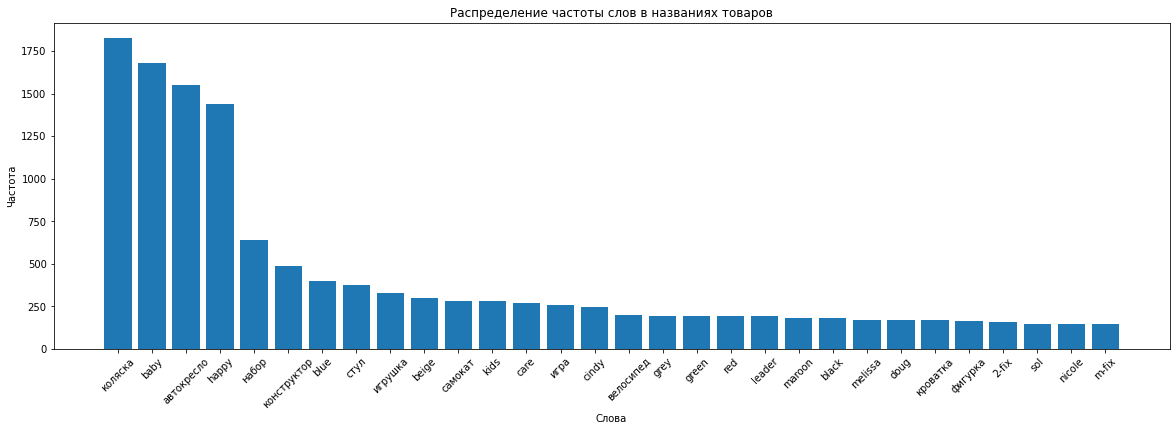

In [68]:
TN2word['Детские товары'] = [pair[0] for pair in plot_dist_of_words('Детские товары', 30)]
words_to_remove = ['Happy', 'Набор','Стул','Cindy', 'Blue','Leader', 'blue','Melissa', 'Doug', '2-Fix',
                   'beige', 'Sol', 'M-Fix', 'Nicole', 'Beige', 'Juno', 'Бустер', 'Limestone', 'Rider', 
                   'Велосипед']
TN2word['Детские товары'] = [word for word in TN2word['Детские товары'] if word not in words_to_remove]

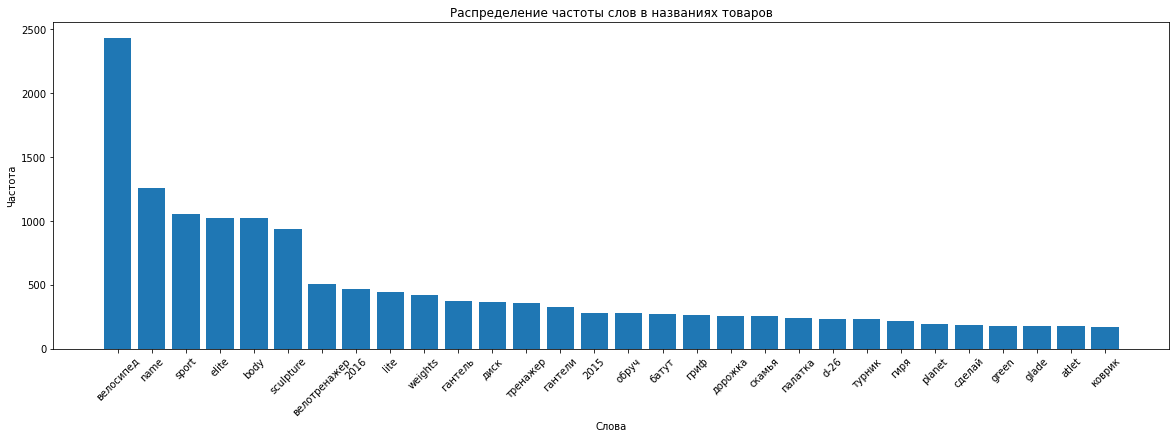

In [69]:
TN2word['Спорт и активный отдых'] = [pair[0] for pair in plot_dist_of_words('Спорт и активный отдых', 30)]
words_to_remove = ['Name','Elite','2016', 'Lite', 'Weights','2015','d-26', 
                   'Planet', 'Сделай', 'Green', 'Glade','ATLET']
TN2word['Спорт и активный отдых'] = [word for word in TN2word['Спорт и активный отдых'] if word not in words_to_remove]

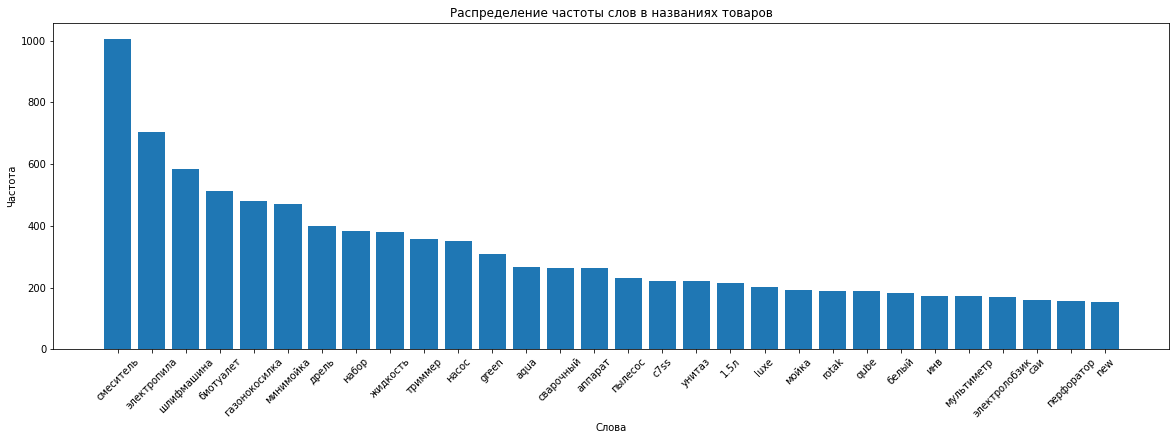

In [70]:
TN2word['Сделай сам'] = [pair[0] for pair in plot_dist_of_words('Сделай сам', 30)]
words_to_remove = ['1.5л', 'C7SS', 'LUXE', 'Qube', 'аппарат','белый', 'Rotak', 'инв', 'САИ','Набор', 'Aqua',]
TN2word['Сделай сам'] = [word for word in TN2word['Сделай сам'] if word not in words_to_remove]

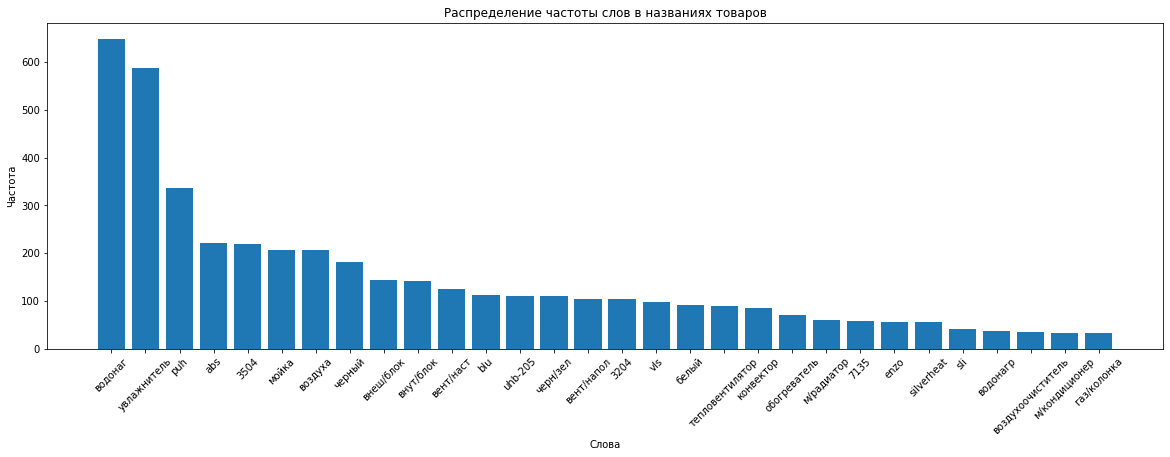

In [71]:
TN2word['Климат'] = [pair[0] for pair in plot_dist_of_words('Климат', 30)]
words_to_remove = ['3504', 'воздуха', 'черный', 'Внеш/блок', 'Внут/блок', 'Вент/наст', 'BLU','UHB-205', 
                   'черн/зел', 'Вент/напол', '3204', 'VLS', 'белый', '7135', 'Enzo', 'Silverheat', 'Sli',]
TN2word['Климат'] = [word for word in TN2word['Климат'] if word not in words_to_remove]

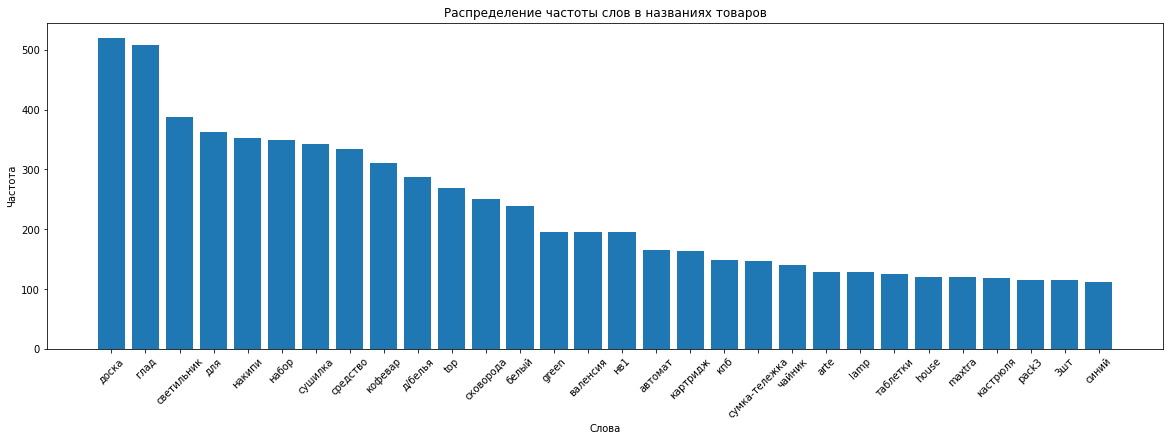

In [72]:
TN2word['Товары для дома'] = [pair[0] for pair in plot_dist_of_words('Товары для дома', 30)]
words_to_remove = []
TN2word['Товары для дома'] = [word for word in TN2word['Товары для дома'] if word not in words_to_remove]

Весьма сумбурная категория, не будем расширять

In [73]:
TN2word['Товары для дома'] = []

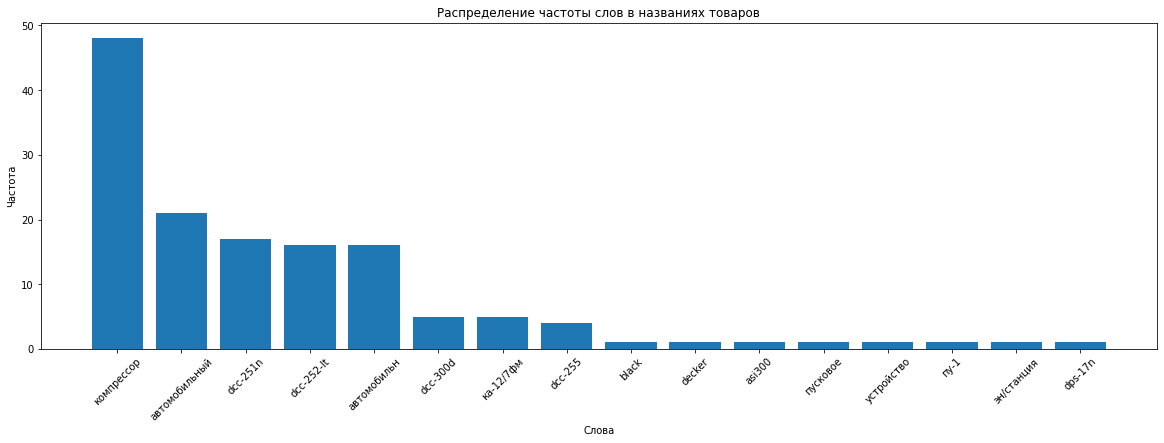

In [74]:
TN2word['Автотовары'] = [pair[0] for pair in plot_dist_of_words('Автотовары', 30)]
words_to_remove = ['Black', 'Decker', 'ASI300', 'Пусковое', 'устройство', 'ПУ-1', 'Эн/станция', 'DPS-17N']
TN2word['Автотовары'] = [word for word in TN2word['Автотовары'] if word not in words_to_remove]

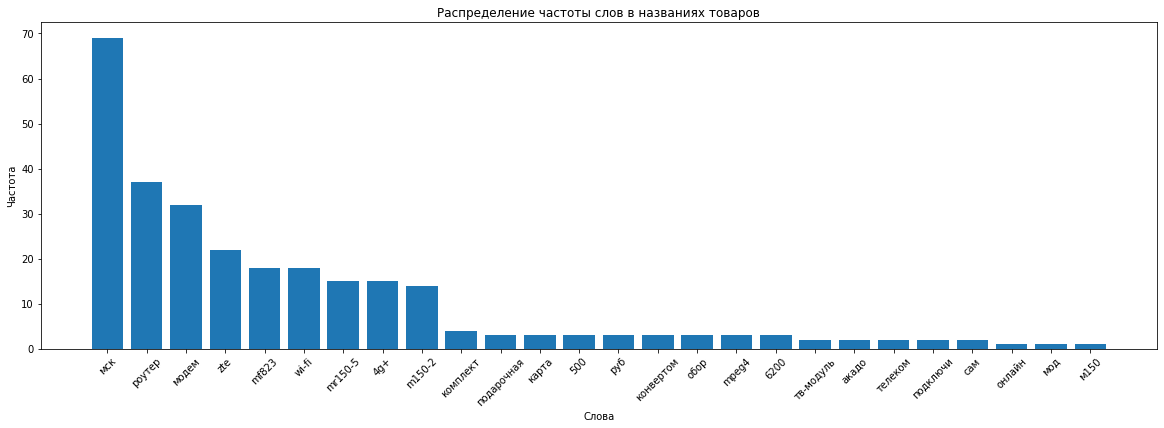

In [75]:
TN2word['Услуги'] = [pair[0] for pair in plot_dist_of_words('Услуги', 30)]
words_to_remove = []
TN2word['Услуги'] = [word for word in TN2word['Услуги'] if word not in words_to_remove]

In [76]:
TN2word['Услуги'].extend(['доставка', 'сервисного', 'сервис+2.0', 'сборка', 'подкл', 'полис', 
                          'установка', 'навес', 'гарант', 'акция'])

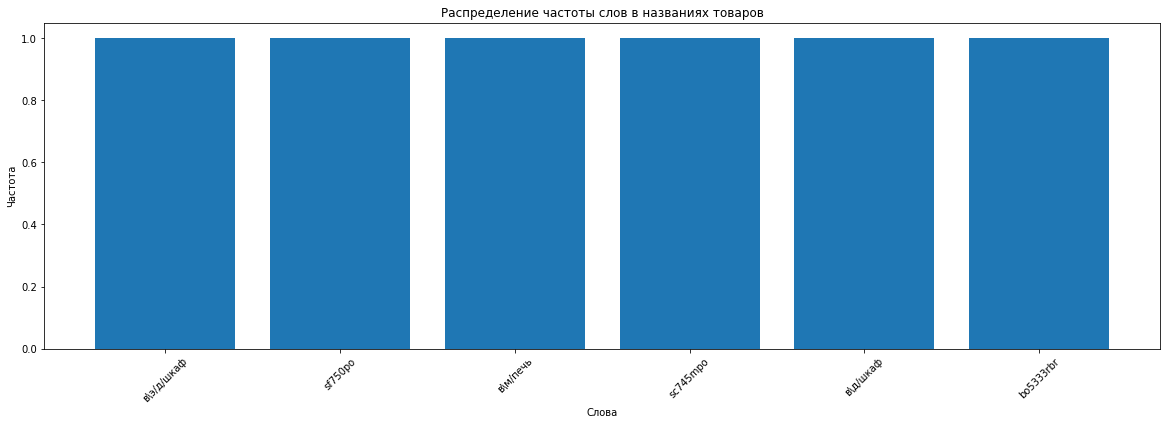

In [77]:
TN2word['Элитная техника'] = [pair[0] for pair in plot_dist_of_words('Элитная техника', 30)]
words_to_remove = []
TN2word['Элитная техника'] = [word for word in TN2word['Элитная техника'] if word not in words_to_remove]

Слишком малочисленная категория -- удалим

In [78]:
df = df.drop(df[df['TN'] == 'Элитная техника'].index)

In [79]:
def replace_nan_with_category(row):
    nom_name = row['Nom_Name']
    tn = row['TN']
    if pd.isna(tn):
        for category, words in TN2word.items():
            if any(word in nom_name.lower() for word in words):
                return category
    return tn

# Применение функции к каждой строке датасета
df['TN'] = df.apply(replace_nan_with_category, axis=1)

## Удаление категории услуг

In [80]:
row_deleted_num['услуги'] = len(df[df['TN'] == 'Услуги'])
df = df[df['TN'] != 'Услуги']

## Восстанавливаем TK

In [81]:
def get_most_popular_words_TK(category, num):
    # Фильтрация строк с категорией category
    filtered_df = df[df['TK'] == category]

    # Объединение названий товаров в одну строку
    product_names = ' '.join(filtered_df['Nom_Name'])

    # Токенизация текста на отдельные слова
    tokens = word_tokenize(product_names)

    # Удаление стоп-слов
    stop_words = brands
    tokens = [word.lower() for word in tokens if word.lower() not in stop_words and len(word) > 2]

    # Вычисление частоты встречаемости слов
    freq_dist = FreqDist(tokens)

    # Получение num наиболее часто встречающихся слов и их частот
    
    most_common_words = freq_dist.most_common(num)
    words, frequencies = zip(*most_common_words)

    return words

In [82]:
TK_values = df['TK'].unique()
TK2word = {tn: [] for tn in TK_values}

In [83]:
for key in TK_values:
    if not pd.isna(key):
        TK2word[key] = list(get_most_popular_words_TK(key, 5))

In [84]:
TK2word['Музыкальные центры'].append('музыкальный')

In [85]:
def replace_nan_with_category_TK(row):
    nom_name = row['Nom_Name']
    tk = row['TK']
    if pd.isna(tk):
        for category, words in TK2word.items():
            if any(word in nom_name.lower() for word in words):
                return category
    return tk

# Применение функции к каждой строке датасета
df['TK'] = df.apply(replace_nan_with_category_TK, axis=1)

In [86]:
info(df)

,Zero_Count,Unique_Count,NaN_Count,NaN_Percentage
Order_ID,0,103384,0,0.0
Phone_new,0,88147,0,0.0
Source,0,4,0,0.0
OneClick,109897,2,0,0.0
is_pickup,29635,2,0,0.0
PaymentType,0,3,0,0.0
Area,0,7,0,0.0
Store_ID,0,158,0,0.0
FullSum,0,12337,0,0.0
Discount,99623,1626,0,0.0


In [87]:
pd.unique(df['TN'])

array(['Аксессуары', 'Крупная бытовая техника', 'Цифровая Техника',
       'Мелкая бытовая техника', 'ТВ-Аудио', 'Мебель', 'Детские товары',
       'Спорт и активный отдых', 'Сделай сам', 'Климат',
       'Игры, софт и развлечения', 'Товары для дома', 'Автотовары'],
      dtype=object)

In [88]:
df = df.loc[:, ['Order_ID', 'Phone_new', 'Source', 'PaymentType', 'Area', 'Quant', 'RowDiscount', 'RowPrice', 'TN']]

In [89]:
categorical_columns = ['Source', 'PaymentType', 'Area', 'TN']

df = pd.get_dummies(df, columns=categorical_columns)


In [90]:
df_grouped = df.groupby('Phone_new').agg({
    'Order_ID': 'nunique',  # Количество уникальных значений в столбце Order_ID
    'OrderDate': 'max',
    'Quant': 'sum',
    'RowDiscount': 'sum',
    'RowPrice': 'sum',
    'Source_Колл-центр': 'sum',
    'Source_Онлайн-Резерв.': 'sum',
    'Source_Сайт': 'sum',
    'Source_Терминал': 'sum',
    'PaymentType_Безналичная': 'sum',
    'PaymentType_Кредит в магазине': 'sum',
    'PaymentType_Наличные': 'sum',
    'Area_ДФО': 'sum',
    'Area_ПФО': 'sum',
    'Area_СЗФО': 'sum',
    'Area_СФО': 'sum',
    'Area_УФО': 'sum',
    'Area_ЦФО': 'sum',
    'Area_ЮФО': 'sum',
    'TN_Автотовары': 'sum',
    'TN_Аксессуары': 'sum',
    'TN_Детские товары': 'sum',
    'TN_Игры, софт и развлечения': 'sum',
    'TN_Климат': 'sum',
    'TN_Крупная бытовая техника': 'sum',
    'TN_Мебель': 'sum',
    'TN_Мелкая бытовая техника': 'sum',
    'TN_Сделай сам': 'sum',
    'TN_Спорт и активный отдых': 'sum',
    'TN_ТВ-Аудио': 'sum',
    'TN_Товары для дома': 'sum',
    'TN_Цифровая Техника': 'sum'
})

In [91]:
df_grouped = df_grouped.rename(columns={'Order_ID': 'Кол-во чеков',
                                        'RowPrice': 'Общая сумма чеков', 
                                        'OrderDate': 'LastOrderDate'})

In [92]:
TN_columns = [col for col in df_grouped.columns if col.startswith('TN')]
df_grouped[TN_columns] = df_grouped[TN_columns].div(df_grouped[TN_columns].sum(axis=1), axis=0)


In [93]:
df_grouped['Среднее кол-во товаров в чеке'] = df_grouped['Quant'] / df_grouped['Кол-во чеков']
df_grouped['Средняя сумма в чеке'] = df_grouped['Общая сумма чеков'] / df_grouped['Quant']

In [94]:
df_grouped.to_csv('vitrina.csv')  

In [102]:
row_deleted_num_df = pd.DataFrame(list(row_deleted_num.items()), columns=['Причина', 'Кол-во удаленных строк'])

In [105]:
row_deleted_num_df = row_deleted_num_df.set_index('Причина')

In [116]:
row_deleted_num_df.loc['Заказ/товар слишком большой'] = row_deleted_num_df.loc['FullSum too high (>200000)'] + row_deleted_num_df.loc['RowPrice too high (>200000)']
row_deleted_num_df.loc['Заказ/товар повседневный'] = row_deleted_num_df.loc['RowPrice too low (<200)'] + row_deleted_num_df.loc['FullSum too low (<200)']
row_deleted_num_df.loc['Слишком большая скидка'] = row_deleted_num_df.loc['Discount too high (>15000)'] + row_deleted_num_df.loc['Discount too high (>90%)'] + \
                                                    row_deleted_num_df.loc['RowDiscount too high (>15000)'] + row_deleted_num_df.loc['RowDiscount too high (>90%)'] 
row_deleted_num_df.loc['Отрицательная скидка'] = row_deleted_num_df.loc['RowDiscount < 0']
row_deleted_num_df.loc['Отмененные заказы'] = row_deleted_num_df.loc['not_issued']
row_deleted_num_df.loc['Без имени'] = row_deleted_num_df.loc['no name']
row_deleted_num_df.loc['Без телефона'] = row_deleted_num_df.loc['no phone']

row_deleted_num_df = row_deleted_num_df.drop(['FullSum too high (>200000)','FullSum too low (<200)', 'Discount too high (>15000)', 
         'Discount too high (>90%)', 'RowPrice too high (>200000)', 'RowPrice too low (<200)',
         'RowDiscount too high (>15000)', 'RowDiscount too high (>90%)', 'RowDiscount < 0',
         'not_issued', 'no name', 'no phone'])


In [117]:
row_deleted_num_df

,Кол-во удаленных строк
Причина,
услуги,6849
Заказ/товар слишком большой,235
Заказ/товар повседневный,158501
Слишком большая скидка,999
Отрицательная скидка,6
Отмененные заказы,70562
Без имени,4
Без телефона,2716
